# Database ampliation to increase analytic studies

### Intro: The work starts with a DB property of the University of Vigo, arranged and completed with Machine Learning applying the KNN algorithm (Step 1).It  contains Financial Data of 374 enterprises. It wants to talk about financial health, and this data wants to study the difference between enterprises helped by a Busisness Incubator or not, to determine if it's something relevant on their survival. 

#### TARGET 1: Search and arrange of dispersed values ( enterprises) to make possible some graphical representations 

#### TARGET 2: Creation of new Data ( tables of correlations and medians grouped by the 2 booleans we have on Data, Incubated and alive)  

## Target 1: Dispersed values ( enterprises) 

##### Certain enterprises have a financial data "out" of the main range. This difficults certain studies like box plot graphs: where most of enterprises have values around 1 million, to have a few 10 times bigger convert the boxes into lines in simple view. This is not good in terms that I must do a visual representation to explain analysis by PowerBI. 

##### To have the original dataframe able to work with, and not only work with medians, Search & Modify of that companies proportion it is what is about this step. 

#### This step consist on detect that dispersed values using standard deviation.

#### The steps are to check values >3 on that deviation, which means they are Very far from most. To do that, Data minus Mean is divided by std. deviation

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datosK=pd.read_csv ('/users/Sergio/Downloads/UvigoKNNrellenado.csv', index_col= 0)

In [3]:
datosK.head(n=2)

,ID,Añonatural3,Estadodummy,Incubada,ActividadInternacionalDummy,CantidadMarcasenpropiedad,cnae2d,Edad_días3,año_constitucion,Númeroempleados_mean,...,gtosexplotratio_mean,pasivototal_mean,debtassetratio_mean,cashflowratio_mean,ratiocoberturaintereses_mean,tangibleratio_mean,equityperemployee_mean,salesperemployee_mean,innovationperemployee_mean,innovationtosales_mean
0,1.0,2019.0,0.0,1.0,1.0,0.0,71.0,3662.0,2009.0,1.000,...,636.0,4.591778e+04,1.778889,0.205333,1013.092556,3.781333,-25124.0,23353.0,8911.0,364.0
1,2.0,2019.0,0.0,1.0,1.0,5.0,72.0,4277.0,2008.0,9.667,...,1705.0,3.016740e+06,0.454000,0.074000,4.979000,6.103000,341504.0,20945.0,40622.0,1966.0


### Step 1.  Creating a new DF same as original which will finally contain only those dispersed values

In [4]:
Dev= (datosK - datosK.mean())/ datosK.std()

In [5]:
## According to accounting, it is enough to check those 3 variables : assets, liabilities, net capital
Dev= Dev[["Activonocorriente_mean","Activocorriente_mean","Totalpatrimonionetoypasivo_mean"]]

#Inserting ID and booleans
Dev["ID"]=datosK["ID"]
Dev["Incubadas"]=datosK["Incubada"]
Dev["Estadodummy"]=datosK["Estadodummy"]
Dev["Desv"]= Dev.Activonocorriente_mean>3

#Keeping only True
Dev = Dev[Dev["Desv"] == True]

print (" Deviation ")
Dev.head()


 Deviation 


,Activonocorriente_mean,Activocorriente_mean,Totalpatrimonionetoypasivo_mean,ID,Incubadas,Estadodummy,Desv
1,6.019660,1.311312,5.028003,2.0,1.0,0.0,True
4,4.534624,2.286490,4.333270,5.0,1.0,0.0,True
71,7.012504,1.901644,6.013561,74.0,1.0,0.0,True
185,5.018473,1.819306,4.496936,192.0,0.0,0.0,True
254,10.806284,0.621011,8.296177,270.0,0.0,0.0,True


In [6]:
datosK["Activonocorriente_mean"].iloc[1]

5733195.0

###### iloc 1 has a deviation of 6 in "non-current asset" and a value of 5,733,195 (€uros) on that variable, same as in other 5 "Outliers" detected 
###### Here we have 2 options: drop those 6 ids, or return a proportional value ( because the interesting is the difference between variables)
###### I used second option, so I will divide all accounting variables by 10 (except ratios) to get companies 10 times smaller

### Step 2: transforming outliers in 10 times smaller companies (keeping their own proportionallity)

In [7]:
# First we need to separate Data in divisible (accounting except ratios) and not 
ratios= datosK[['RatioEndeudamiento_mean','ratiofondomaniobra_mean','equity_mean','eficiencia_mean','debtassetratio_mean','cashflowratio_mean','ratiocoberturaintereses_mean','tangibleratio_mean']].copy()
nodivision= datosK[['ID','Añonatural3','Númeroempleados_mean','Estadodummy','Incubada','ActividadInternacionalDummy','CantidadMarcasenpropiedad','cnae2d','Edad_días3','año_constitucion']]

# DF datos with only divisible data
datos= datosK
datos= datos.drop(['ID','Añonatural3','Númeroempleados_mean','Estadodummy','Incubada','ActividadInternacionalDummy','CantidadMarcasenpropiedad','cnae2d','Edad_días3','año_constitucion','RatioEndeudamiento_mean','ratiofondomaniobra_mean','equity_mean','eficiencia_mean','debtassetratio_mean','cashflowratio_mean','ratiocoberturaintereses_mean','tangibleratio_mean'], axis= 1)

# DF with outliers modified
modificadas= datos.iloc[[1,4,71,185,254]]
modificadas= modificadas/10
pd.set_option('display.max_columns', 500)
modificadas.head()

# inserting non divisible columns
modificadas[['ID','Añonatural3','Númeroempleados_mean','Estadodummy','Incubada','ActividadInternacionalDummy','CantidadMarcasenpropiedad','cnae2d','Edad_días3','año_constitucion','RatioEndeudamiento_mean','ratiofondomaniobra_mean','equity_mean','eficiencia_mean','debtassetratio_mean','cashflowratio_mean','ratiocoberturaintereses_mean','tangibleratio_mean']]= datosK[['ID','Añonatural3','Númeroempleados_mean','Estadodummy','Incubada','ActividadInternacionalDummy','CantidadMarcasenpropiedad','cnae2d','Edad_días3','año_constitucion','RatioEndeudamiento_mean','ratiofondomaniobra_mean','equity_mean','eficiencia_mean','debtassetratio_mean','cashflowratio_mean','ratiocoberturaintereses_mean','tangibleratio_mean']]

#reordering columns as original data
modificadas = modificadas.reindex(datosK.columns, axis=1)

#replacing modified
Datos= datosK
Datos.iloc[1]= modificadas.iloc[0]
Datos.iloc[4]= modificadas.iloc[1]
Datos.iloc[71]= modificadas.iloc[2]
Datos.iloc[185]= modificadas.iloc[3]
Datos.iloc[254]= modificadas.iloc[4]
Datos.head()

,ID,Añonatural3,Estadodummy,Incubada,ActividadInternacionalDummy,CantidadMarcasenpropiedad,cnae2d,Edad_días3,año_constitucion,Númeroempleados_mean,Activonocorriente_mean,Activocorriente_mean,Pasivonocorriente_mean,Pasivocorriente_mean,Totalpatrimonionetoypasivo_mean,Patrimonioneto_mean,Fondospropios_mean,RatioEndeudamiento_mean,Ventasnetas_mean,Gastosdepersonal_mean,OtrosGtosExp_mean,Amortizacion_mean,Resultadodeexplotación_mean,Resultadofinanciero_mean,Efectivo_mean,Gastosfin_mean,InmovMat_mean,Aprovisiona_mean,VA_mean,fondomaniobra_mean,totalactivo_mean,ratiofondomaniobra_mean,equity_mean,eficiencia_mean,liquidez_mean,margenbruto_mean,materiales_mean,costelaboral_mean,gtosexplotratio_mean,pasivototal_mean,debtassetratio_mean,cashflowratio_mean,ratiocoberturaintereses_mean,tangibleratio_mean,equityperemployee_mean,salesperemployee_mean,innovationperemployee_mean,innovationtosales_mean
0,1.0,2019.0,0.0,1.0,1.0,0.0,71.0,3662.0,2009.0,1.000,8226.333333,26976.0,16436.666667,52100.0,26976.0,-25124.0,-25124.0,172.093,23353.000000,27960.0,14441.0,-1790.888889,-19049.0,231.555556,11298.0,431.0,4307.0,8859.333333,8911.0,-25124.0,2.905322e+04,-1.353778,-1.058778,1.035667,613.0,-84191.000000,1088.777778,1206.000000,636.000000,45917.777778,1.778889,0.205333,1013.092556,3.781333,-25124.0,23353.000000,8911.0,364.000000
1,2.0,2019.0,0.0,1.0,1.0,5.0,72.0,4277.0,2008.0,9.667,573319.500000,91099.2,221884.900000,79789.1,664418.7,362744.7,328657.0,38.645,20328.900000,61070.2,34226.3,-43189.300000,-66158.9,-12519.400000,22267.7,13492.9,5896.1,15405.900000,39074.2,11310.1,6.644187e+05,0.017000,0.494000,0.031000,113.4,-32739.400000,77.900000,304.800000,170.500000,301674.000000,0.454000,0.074000,4.979000,6.103000,34150.4,2094.500000,4062.2,196.600000
2,3.0,2019.0,0.0,1.0,0.0,1.0,73.0,2981.0,2011.0,1.000,5381.000000,46723.0,13115.333333,43223.0,52104.0,8881.0,8881.0,22.655,124913.000000,32678.0,26970.0,-1463.000000,7460.0,-102.000000,27804.0,111.0,4781.0,56439.000000,41609.0,3500.0,5.210400e+04,0.057000,0.162000,2.361000,1088.0,6358.000000,427.000000,269.000000,228.000000,38528.777778,0.665556,0.745222,-83.979000,4.781000,8881.0,124913.000000,41609.0,346.000000
3,4.0,2019.0,0.0,1.0,0.0,1.0,49.0,5405.0,2005.0,14.667,829790.000000,185009.0,210161.000000,201395.0,1014799.0,603244.0,603244.0,30.248,891052.000000,420984.0,280177.0,-109909.000000,41448.0,-5166.000000,23994.0,5208.0,727233.0,78543.000000,572383.0,-16386.0,1.014799e+06,-0.005000,0.599000,0.884000,1383.0,4737.000000,88.000000,470.000000,315.000000,411556.000000,0.401000,0.072000,-8.139000,49.345000,41806.0,61648.000000,39169.0,641.000000
4,5.0,2019.0,0.0,1.0,0.0,1.0,72.0,3842.0,2009.0,5.000,438338.800000,141120.7,178396.900000,5516.4,579459.5,395546.2,395546.2,33.786,123906.688889,29325.2,5190.6,-120.100000,-2187.4,-851.700000,137572.3,659.0,20.4,30226.900000,27025.2,135604.3,5.794595e+05,0.215000,0.654000,0.345556,2474.7,-34994.722222,77.444444,215.577778,95.255556,183913.300000,0.346000,0.844000,5.252000,0.041000,79109.2,5024.866667,5405.0,-88.122222


###### We can appreciate on ID 2 and 5 ( locs 1 and 4) data is modified into a proportional . Now I have a DB without outliers and also without eliminate any data "creating new companies with an accounting proportional to the outlers"


In [8]:
Datos.to_csv('/users/Sergio/Downloads/UVigo374sindispersion.csv')

## Target 2: Creation of new Data tables from Original Data

### Step 1: Creating a correlation table for the 2 booleans

In [9]:
Datos["Incubada"]=Datos["Incubada"].astype(bool)
Datos["Estadodummy"]=Datos["Estadodummy"].astype(bool)


# To do this create 4 DF separating booleans + the original 
Incubadas1=Datos[Datos["Incubada"] == True]
Incubadas0= Datos[Datos["Incubada"] == False]
Estado1= Datos[Datos["Estadodummy"] == True]
Estado0= Datos[Datos["Estadodummy"] == False]


# Initially I was going to apply this function and select a cut-off mark, but maybe correlation is inverse on some group 
# So first I will check that and if not, reduce table  with this
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

In [10]:
# I want all correlations but not a matrix so: 
CorrDatos=Datos.corr().unstack().sort_values().drop_duplicates()
CorrIncubadas1=Incubadas1.corr().unstack().sort_values().drop_duplicates()
CorrIncubadas0=Incubadas0.corr().unstack().sort_values().drop_duplicates()
CorrEstado1=Estado1.corr().unstack().sort_values().drop_duplicates()
CorrEstado0=Estado0.corr().unstack().sort_values().drop_duplicates()


## Actually correlations are series and not dataframes, the fastest way to convert series on 3 columns si save it as csv 
# and reimport data
CorrDatos.to_csv('/users/Sergio/Downloads/CorrdatosK.csv')
CorrIncubadas1.to_csv('/users/Sergio/Downloads/CorrIncubadas1.csv')
CorrIncubadas0.to_csv('/users/Sergio/Downloads/CorrIncubadas0.csv')
CorrEstado1.to_csv('/users/Sergio/Downloads/CorrEstado1.csv')
CorrEstado0.to_csv('/users/Sergio/Downloads/CorrEstado0.csv')


#importing
CorrDatos=pd.read_csv ('/users/Sergio/Downloads/CorrdatosK.csv')
CorrIncubadas1=pd.read_csv ('/users/Sergio/Downloads/CorrIncubadas1.csv')
CorrIncubadas0=pd.read_csv ('/users/Sergio/Downloads/CorrIncubadas0.csv')
CorrEstado1=pd.read_csv ('/users/Sergio/Downloads/CorrEstado1.csv')
CorrEstado0=pd.read_csv ('/users/Sergio/Downloads/CorrEstado0.csv')


# The 3 columns renamed
CorrDatos.columns=["Variable 1","Variable 2", "Correlación BD"]
CorrIncubadas1.columns=["Variable 1","Variable 2", "Correlación CorrIncubadas1"]
CorrIncubadas0.columns=["Variable 1","Variable 2", "Correlación CorrIncubadas0"]
CorrEstado1.columns=["Variable 1","Variable 2", "Correlación CorrEstado1"]
CorrEstado0.columns=["Variable 1","Variable 2", "Correlación CorrEstado0"]


CorrDatos.dtypes

Variable 1         object
Variable 2         object
Correlación BD    float64
dtype: object

In [11]:
# Now that variable columns are called the same , I can merge them into same DF
T=pd.merge(CorrDatos, CorrIncubadas1, on=['Variable 1', 'Variable 2'], how= "outer")
Ta=pd.merge(T, CorrIncubadas0, on=['Variable 1', 'Variable 2'], how= "outer")

Tabl=pd.merge(Ta, CorrEstado1, on=['Variable 1', 'Variable 2'], how= "outer")

Tabla=pd.merge(Tabl, CorrEstado0, on=['Variable 1', 'Variable 2'], how= "outer")

Tabla.count()


Variable 1                    2184
Variable 2                    2184
Correlación BD                1129
Correlación CorrIncubadas1    1082
Correlación CorrIncubadas0    1082
Correlación CorrEstado1       1082
Correlación CorrEstado0       1036
dtype: int64

In [12]:
# Of corse we have duplicated where Var1 & Var2 = Var2 & Var1
# I need a frozen set because it is not hashable
grouper = [frozenset(t) for t in Tabla[['Variable 1','Variable 2']].values]
Tabla= Tabla.groupby(grouper, as_index = False).agg({'Variable 1':'first', 'Variable 2':'first', 'Correlación BD':'sum', 'Correlación CorrIncubadas1':'sum','Correlación CorrIncubadas0':'sum','Correlación CorrEstado1':'sum','Correlación CorrEstado0':'sum' })

Tabla.count()

Variable 1                    1129
Variable 2                    1129
Correlación BD                1129
Correlación CorrIncubadas1    1129
Correlación CorrIncubadas0    1129
Correlación CorrEstado1       1129
Correlación CorrEstado0       1129
dtype: int64

In [13]:
# Tabla is now reduced to 1129 correlations and this is the view
Tabla.head(n=5)

,Variable 1,Variable 2,Correlación BD,Correlación CorrIncubadas1,Correlación CorrIncubadas0,Correlación CorrEstado1,Correlación CorrEstado0
0,debtassetratio_mean,equity_mean,-0.918746,-0.789441,-0.941841,-0.791110,-0.969270
1,pasivototal_mean,CantidadMarcasenpropiedad,0.071476,0.003833,0.135930,-0.064415,0.103118
2,Resultadofinanciero_mean,Edad_días3,0.071476,0.099013,0.026923,-0.018462,-0.000476
3,gtosexplotratio_mean,Incubada,0.072417,0.000000,0.000000,0.127277,0.068580
4,cashflowratio_mean,año_constitucion,0.072932,0.098198,0.118444,0.112918,0.084810


In [14]:
#Interesting correlations are the ones with variation
#So we can reduce it more and get only correlations where variation between variables are >0.3
import math

#creating a DF with max and min values
jun=[]
jun=Tabla.max(axis=1).to_frame()
jun[2]=Tabla.min(axis=1)

#renaming
jun.columns=["uno","dos"]
jun.head()

C:\Users\Sergio\AppData\Local\Temp/ipykernel_7508/1703810891.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  jun=Tabla.max(axis=1).to_frame()
C:\Users\Sergio\AppData\Local\Temp/ipykernel_7508/1703810891.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  jun[2]=Tabla.min(axis=1)


,uno,dos
0,-0.789441,-0.969270
1,0.135930,-0.064415
2,0.099013,-0.018462
3,0.127277,0.000000
4,0.118444,0.072932


In [15]:
#getting the diference
jun=jun.diff(axis=1)
jun=jun.drop(["uno"],axis=1)
jun.head()

#inserting Variables
jun["Variable 1"]=Tabla["Variable 1"]
jun["Variable 2"]=Tabla["Variable 2"]

# transforming difference to absolute value and getting only >0.3
jun["dos"]=jun["dos"].abs()
jun["difference"]=jun["dos"]>0.3
jun=jun[jun["difference"] == True]
jun=jun.rename(columns={'dos': 'difference'})
jun.count()

difference    223
Variable 1    223
Variable 2    223
difference    223
dtype: int64

In [16]:
jun.head(n=5)

,difference,Variable 1,Variable 2,difference
17,0.349821,liquidez_mean,ratiofondomaniobra_mean,True
26,0.401186,innovationperemployee_mean,Pasivocorriente_mean,True
28,0.308756,Añonatural3,Resultadodeexplotación_mean,True
39,0.497374,innovationperemployee_mean,OtrosGtosExp_mean,True
41,0.414208,gtosexplotratio_mean,Pasivocorriente_mean,True


### Now we got the ilocs to transform previous correlation data and resume 1129 correlations in 223 relevants

In [17]:
Tabla2=Tabla

In [18]:
Tabla2 = Tabla2[Tabla2.index.isin(jun.index)]

In [19]:
Tabla2.head(n=5)

,Variable 1,Variable 2,Correlación BD,Correlación CorrIncubadas1,Correlación CorrIncubadas0,Correlación CorrEstado1,Correlación CorrEstado0
17,liquidez_mean,ratiofondomaniobra_mean,0.080262,0.057942,0.108773,0.407763,0.070232
26,innovationperemployee_mean,Pasivocorriente_mean,0.085281,-0.206419,0.194767,-0.071668,0.177329
28,Añonatural3,Resultadodeexplotación_mean,0.081898,0.066258,0.097351,-0.211405,0.000000
39,innovationperemployee_mean,OtrosGtosExp_mean,0.058097,-0.243684,0.207435,-0.045875,0.253691
41,gtosexplotratio_mean,Pasivocorriente_mean,0.059025,0.366105,-0.048104,0.099291,-0.022469


In [20]:
Tabla2.to_csv('/users/Sergio/Downloads/CorrelacionesConVariacion.csv')

### Also I save a Second DF with biggest correlations 

In [21]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(Datos, .6).to_csv('/users/Sergio/Downloads/1CorrDatos.csv')
corrFilter(Incubadas1, .6).to_csv('/users/Sergio/Downloads/1CorrIncubadas1.csv')
corrFilter(Incubadas0, .6).to_csv('/users/Sergio/Downloads/1CorrIncubadas0.csv')
corrFilter(Estado1, .6).to_csv('/users/Sergio/Downloads/1CorrEstado1.csv')
corrFilter(Estado0, .6).to_csv('/users/Sergio/Downloads/1CorrEstado0.csv')

SCorrDatos=pd.read_csv ('/users/Sergio/Downloads/1CorrDatos.csv')
SCorrIncubadas1=pd.read_csv ('/users/Sergio/Downloads/1CorrIncubadas1.csv')
SCorrIncubadas0=pd.read_csv ('/users/Sergio/Downloads/1CorrIncubadas0.csv')
SCorrEstado1=pd.read_csv ('/users/Sergio/Downloads/1CorrEstado1.csv')
SCorrEstado0=pd.read_csv ('/users/Sergio/Downloads/1CorrEstado0.csv')

SCorrDatos.columns=["Variable 1","Variable 2", "Correlación BD"]
SCorrIncubadas1.columns=["Variable 1","Variable 2", "Correlación CorrIncubadas1"]
SCorrIncubadas0.columns=["Variable 1","Variable 2", "Correlación CorrIncubadas0"]
SCorrEstado1.columns=["Variable 1","Variable 2", "Correlación CorrEstado1"]
SCorrEstado0.columns=["Variable 1","Variable 2", "Correlación CorrEstado0"]

In [22]:
ST=pd.merge(SCorrDatos, SCorrIncubadas1, on=['Variable 1', 'Variable 2'], how= "outer")

STa=pd.merge(ST, SCorrIncubadas0, on=['Variable 1', 'Variable 2'], how= "outer")

STabl=pd.merge(STa, SCorrEstado1, on=['Variable 1', 'Variable 2'], how= "outer")

STabla=pd.merge(STabl, SCorrEstado0, on=['Variable 1', 'Variable 2'], how= "outer")

STabla.count()

Variable 1                    211
Variable 2                    211
Correlación BD                 78
Correlación CorrIncubadas1     61
Correlación CorrIncubadas0     88
Correlación CorrEstado1        66
Correlación CorrEstado0        98
dtype: int64

In [23]:
grouper = [frozenset(t) for t in STabla[['Variable 1','Variable 2']].values]
STabla= STabla.groupby(grouper, as_index = False).agg({'Variable 1':'first', 'Variable 2':'first', 'Correlación BD':'sum', 'Correlación CorrIncubadas1':'sum','Correlación CorrIncubadas0':'sum','Correlación CorrEstado1':'sum','Correlación CorrEstado0':'sum' })

STabla.count()


Variable 1                    137
Variable 2                    137
Correlación BD                137
Correlación CorrIncubadas1    137
Correlación CorrIncubadas0    137
Correlación CorrEstado1       137
Correlación CorrEstado0       137
dtype: int64

In [24]:
STabla = STabla.replace({'0':np.nan, 0:np.nan})

STabla.count()

Variable 1                    137
Variable 2                    137
Correlación BD                 78
Correlación CorrIncubadas1     61
Correlación CorrIncubadas0     88
Correlación CorrEstado1        66
Correlación CorrEstado0        98
dtype: int64

In [25]:
STabla=STabla.dropna()
STabla.count()

Variable 1                    31
Variable 2                    31
Correlación BD                31
Correlación CorrIncubadas1    31
Correlación CorrIncubadas0    31
Correlación CorrEstado1       31
Correlación CorrEstado0       31
dtype: int64

In [26]:
STabla.head(n=15)

,Variable 1,Variable 2,Correlación BD,Correlación CorrIncubadas1,Correlación CorrIncubadas0,Correlación CorrEstado1,Correlación CorrEstado0
0,debtassetratio_mean,equity_mean,-0.918746,-0.789441,-0.941841,-0.791110,-0.969270
23,totalactivo_mean,Totalpatrimonionetoypasivo_mean,0.997299,0.984585,0.999909,0.989739,0.999913
25,Patrimonioneto_mean,Fondospropios_mean,0.963672,0.930515,0.969045,0.945190,0.974296
26,Gastosdepersonal_mean,VA_mean,0.948267,0.667143,0.958371,0.980839,0.799214
27,pasivototal_mean,Totalpatrimonionetoypasivo_mean,0.947932,0.908254,0.956575,0.952568,0.947774
28,pasivototal_mean,totalactivo_mean,0.946601,0.893452,0.956653,0.944498,0.947778
29,Númeroempleados_mean,Gastosdepersonal_mean,0.892024,0.776718,0.897887,0.906513,0.843926
30,totalactivo_mean,Activonocorriente_mean,0.890543,0.905306,0.897554,0.849235,0.912647
58,Totalpatrimonionetoypasivo_mean,Activonocorriente_mean,0.882700,0.885454,0.897649,0.825430,0.912830
68,Activocorriente_mean,Totalpatrimonionetoypasivo_mean,0.882678,0.694886,0.904984,0.774156,0.916073


In [27]:
STabla.to_csv('/users/Sergio/Downloads/CorrelacionesMayores.csv')

### Target 2.2: Medians Table grouped by booleans

In [28]:
medianaD=Datos.median().to_frame()
medianaI1=Incubadas1.median().to_frame()
medianaI0=Incubadas0.median().to_frame()
medianaE1=Estado1.median().to_frame()
medianaE0=Estado0.median().to_frame()

medianaD.columns=["medianaD"]
medianaI1.columns=["Incubada (1)"]
medianaI0.columns=["No incubada (0)"]
medianaE1.columns=["Muerta (1)"]
medianaE0.columns=["Viva (0)"]

medianaD=medianaD.transpose()
medianaI1=medianaI1.transpose()
medianaI0=medianaI0.transpose()
medianaE1=medianaE1.transpose()
medianaE0=medianaE0.transpose()

In [29]:
frames = [medianaD, medianaI1, medianaI0, medianaE1, medianaE0]

Medianas=pd.concat(frames)

Medianas.drop(['ID', 'Añonatural3', 'Estadodummy', 'Incubada','CantidadMarcasenpropiedad','cnae2d'], axis=1, inplace=True)

Medianas=Medianas.transpose()


# Mistake of data detected below
#Mistake detected on ratiocoberturaintereses_mean negatives are positive and vic.
Medianas.loc["ratiocoberturaintereses_mean"]= Medianas.loc["ratiocoberturaintereses_mean"]* (-1)



Medianas.head(n=6)

,medianaD,Incubada (1),No incubada (0),Muerta (1),Viva (0)
ActividadInternacionalDummy,0.000,0.0,0.000,0.0,0.0
Edad_días3,3563.000,3550.0,3590.000,1772.5,4021.0
año_constitucion,2008.000,2009.0,2008.000,2008.0,2008.5
Númeroempleados_mean,2.333,2.0,2.667,2.0,2.5
Activonocorriente_mean,24768.000,18513.0,31368.000,17729.0,30706.0
Activocorriente_mean,95589.000,73981.0,119183.000,68156.5,105535.5


<AxesSubplot:>

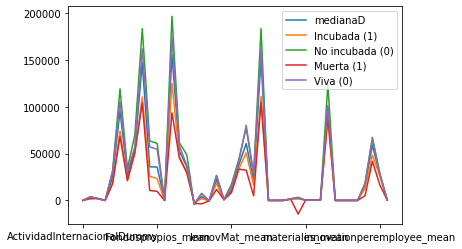

In [30]:
Medianas.plot()

In [31]:
Medianas.to_csv('/users/Sergio/Downloads/MedianasUvigo.csv')

### Just Ratios medians table

In [32]:
Medianas2=Medianas.transpose()

Medianas2=Medianas2.reset_index()

Medianasratios= Medianas2[['RatioEndeudamiento_mean','ratiofondomaniobra_mean','equity_mean','eficiencia_mean','debtassetratio_mean','cashflowratio_mean','ratiocoberturaintereses_mean','tangibleratio_mean']].copy()

Medianasratios= Medianasratios.transpose()

Medianasratios=Medianasratios.rename({0: 'D', 1: 'Incubadas (1)',2: 'No incubadas (0)',3: 'Muerta (1)',4: 'Viva (0)'}, axis=1)
Medianasratios.head(n=10)

,D,Incubadas (1),No incubadas (0),Muerta (1),Viva (0)
RatioEndeudamiento_mean,27.050500,30.248000,24.500000,33.4480,25.337000
ratiofondomaniobra_mean,0.184500,0.179667,0.211000,0.0565,0.249000
equity_mean,0.326000,0.300000,0.343000,0.1645,0.399444
eficiencia_mean,1.277500,1.360000,1.107000,1.0690,1.362500
debtassetratio_mean,0.735500,0.777444,0.693222,0.8855,0.675389
cashflowratio_mean,0.297000,0.299111,0.296000,0.1960,0.351111
ratiocoberturaintereses_mean,6.319500,3.672000,10.230000,-6.7770,14.128000
tangibleratio_mean,4.882389,3.897000,6.091000,3.9445,5.618500


<AxesSubplot:>

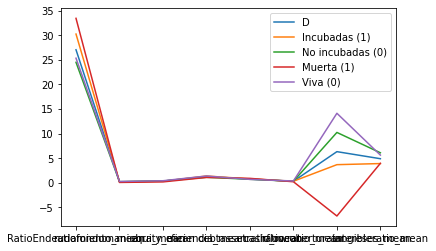

In [33]:
Medianasratios.plot()

In [34]:
Medianasratios.to_csv('/users/Sergio/Downloads/MedianasRatiosUvigo.csv')

# Resume:

#### Data Dispersion arranged
#### New Data with relevant correlations ( with difference between booleans) grouped by booleans
#### New Data with highest correlations grouped by booleans
#### New Data with median values grouped by booleans
#### New Data of only Ratios with median values grouped by booleans

### Targets: Done
